## ML TECHNIQUES FOR REGRESSION

_Adapted from_ https://github.com/mubaris/potential-enigma

Linear Regression is one of the easiest algorithms in machine learning. In this post we will explore this algorithm and we will implement it using Python from scratch.

As the name suggests this algorithm is applicable for Regression problems. Linear Regression is a **Linear Model**. Which means, we will establish a linear relationship between the input variables(**X**) and single output variable(**Y**). When the input(**X**) is a single variable this model is called **Simple Linear Regression** and when there are mutiple input variables(**X**), it is called **Multiple Linear Regression**.

## Simple Linear Regression

We discussed that Linear Regression is a simple model. Simple Linear Regression is the simplest model in machine learning.

### Model Representation

In this problem we have an input variable - **X** and one output variable - **Y**. And we want to build linear relationship between these variables. Here the input variable is called **Independent Variable** and the output variable is called **Dependent Variable**. We can define this linear relationship as follows:

\\[Y = \beta_0 + \beta_1X\\]

The \\(\beta_1\\) is called a scale factor or **coefficient** and \\(\beta_0\\) is called **bias coefficient**. The bias coeffient gives an extra degree of freedom to this model. This equation is similar to the line equation \\(y = mx + b\\) with \\(m = \beta_1\\)(Slope) and \\(b = \beta_0\\)(Intercept). So in this Simple Linear Regression model we want to draw a line between X and Y which estimates the relationship between X and Y.

But how do we find these coefficients? That's the learning procedure. We can find these using different approaches. One is called **Ordinary Least Square Method** and other one is called **Gradient Descent Approach**. We will use Ordinary Least Square Method in Simple Linear Regression and Gradient Descent Approach in Multiple Linear Regression in post.

### Ordinary Least Square Method

Earlier in this post we discussed that we are going to approximate the relationship between X and Y to a line. Let's say we have few inputs and outputs. And we plot these scatter points in 2D space, we will get something like the following image.

![Linear Regression](https://i.imgur.com/pXEpE6x.png)

And you can see a line in the image. That's what we are going to accomplish. And we want to minimize the error of out model. A good model will always have least error. We can find this line by reducing the error. The error of each point is the distance between line and that point. This is illustrated as follows.

![Residue](https://i.imgur.com/306wvA1.png)

And total error of this model is the sum of all errors of each point. ie.

\\[D = \sum_{i=1}^{m} d_i^2\\]

\\(d_i\\) - Distance between line and i<sup>th</sup> point.

\\(m\\) - Total number of points

You might have noticed that we are squaring each of the distances. This is because, some points will be above the line and some points will be below the line. We can minimize the error in the model by minimizing \\(D\\). And after the mathematics of minimizing \\(D\\), we will get;

\\[\beta_1 = \frac{\sum_{i=1}^{m} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{m} (x_i - \bar{x})^2}\\]

\\[\beta_0 = \bar{y} - \beta_1\bar{x}\\]

In these equations \\(\bar{x}\\) is the mean value of input variable **X** and \\(\bar{y}\\) is the mean value of output variable **Y**.

Now we have the model. This method is called [**Ordinary Least Square Method**](https://www.wikiwand.com/en/Ordinary_least_squares). Now we will implement this model in Python.

\\[Y = \beta_0 + \beta_1X\\]

\\[\beta_1 = \frac{\sum_{i=1}^{m} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{m} (x_i - \bar{x})^2}\\]

\\[\beta_0 = \bar{y} - \beta_1\bar{x}\\]

### Implementation

We are going to use a dataset containing head size and brain weight of different people. This data set has other features. But, we will not use them in this model.. This dataset is available in this [Github Repo](https://github.com/mubaris/potential-enigma). Let's start off by importing the data.

In [1]:
# Importing Necessary Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Reading Data
data = pd.read_csv('./data_ML/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


As you can see there are 237 values in the training set. We will find a linear relationship between Head Size and Brain Weights. So, now we will get these variables.

In [2]:
# Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

To find the values \\(\beta_1\\) and \\(\beta_0\\), we will need mean of **X** and **Y**. We will find these and the coeffients.

In [3]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b1, b0)

0.26342933948939945 325.57342104944223


There we have our coefficients.

\\[Brain Weight = 325.573421049 + 0.263429339489 * Head Size\\]

That is our linear model.

Now we will see this graphically.

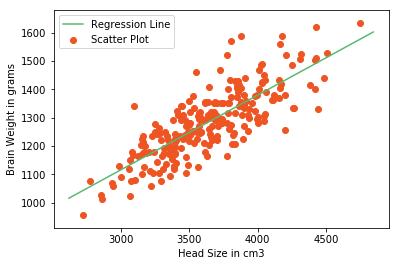

In [4]:
# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

This model is not so bad. But we need to find how good is our model. There are many methods to evaluate models. We will use **Root Mean Squared Error** and **Coefficient of Determination(\\(R^2\\) Score)**.

Root Mean Squared Error is the square root of sum of all errors divided by number of values, or Mathematically,

\\[RMSE = \sqrt{\sum_{i=1}^{m} \frac{1}{m} (\hat{y_i} - y_i)^2}\\]

Here \\(\hat{y_i}\\) is the i<sup>th</sup> predicted output values. Now we will find RMSE.

In [5]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

72.1206213783709


Now we will find \\(R^2\\) score. \\(R^2\\) is defined as follows,

\\[SS_t = \sum_{i=1}^{m} (y_i - \bar{y})^2\\]

\\[SS_r = \sum_{i=1}^{m} (y_i - \hat{y_i})^2\\]

\\[R^2 \equiv 1 - \frac{SS_r}{SS_t}\\]

\\(SS_t\\) is the total sum of squares and \\(SS_r\\) is the total sum of squares of residuals.

\\(R^2\\) Score usually range from 0 to 1. It will also become negative if the model is completely wrong. Now we will find \\(R^2\\) Score.

In [6]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


0.63 is not so bad. Now we have implemented Simple Linear Regression Model using Ordinary Least Square Method. Now we will see how to implement the same model using a Machine Learning Library called [scikit-learn](http://scikit-learn.org/)

### The scikit-learn approach

[scikit-learn](http://scikit-learn.org/) is simple machine learning library in Python. Building Machine Learning models are very easy using scikit-learn. Let's see how we can build this Simple Linear Regression Model using scikit-learn.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Calculating RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957


You can see that this exactly equal to model we built from scratch, but simpler and less code.

Now we will move on to Multiple Linear Regression.

## Multiple Linear Regression

Multiple Linear Regression is a type of Linear Regression when the input has multiple features(variables).

### Model Representation

Similar to Simple Linear Regression, we have input variable(**X**) and output variable(**Y**). But the input variable has \\(n\\) features. Therefore, we can represent this linear model as follows;

\\[Y = \beta_0 + \beta_1x_1 + \beta_1x_2 + ... + \beta_nx_n\\]

\\(x_i\\) is the i<sup>th</sup> feature in input variable. By introducing \\(x_0 = 1\\), we can rewrite this equation.

\\[Y = \beta_0x_0 + \beta_1x_1 + \beta_1x_2 + ... + \beta_nx_n\\]

\\[x_0 = 1\\]

Now we can convert this eqaution to matrix form.

\\[Y = \beta^TX\\]

Where,

\\[\beta = \begin{bmatrix}\beta_0\\\beta_1\\\beta_2\\.\\.\\\beta_n\end{bmatrix}\\]

and

\\[X = \begin{bmatrix}x_0\\x_1\\x_2\\.\\.\\x_n\end{bmatrix}\\]

We have to define the cost of the model. Cost bascially gives the error in our model. **Y** in above equation is the our hypothesis(approximation). We are going to define it as our hypothesis function.

\\[h_\beta(x) = \beta^Tx\\]

And the cost is,

\\[J(\beta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\beta(x^{\textrm{(i)}}) - y^{\textrm{(i)}})^2\\]

By minimizing this cost function, we can get find \\(\beta\\). We use **Gradient Descent** for this.

### Gradient Descent

Gradient Descent is an optimization algorithm. We will optimize our cost function using Gradient Descent Algorithm.


##### Step 1
Initialize values \\(\beta_0\\), \\(\beta_1\\),..., \\(\beta_n\\) with some value. In this case we will initialize with 0.

#### Step 2

Iteratively update,

\\[\beta_j := \beta_j - \alpha\frac{\partial}{\partial \beta_j} J(\beta)\\]

until it converges.

This is the procedure. Here \\(\alpha\\) is the learning rate. This operation \\(\frac{\partial}{\partial \beta_j} J(\beta)\\) means we are finding partial derivate of cost with respect to each \\(\beta_j\\). This is called Gradient.

Read [this](https://math.stackexchange.com/questions/174270/what-exactly-is-the-difference-between-a-derivative-and-a-total-derivative) if you are unfamiliar with partial derivatives.

In step 2 we are changing the values of \\(\beta_j\\) in a direction in which it reduces our cost function. And Gradient gives the direction in which we want to move. Finally we will reach the minima of our cost function. But we don't want to change values of \\(\beta_j\\) drastically, because we might miss the minima. That's why we need learning rate.

![Gradient Descent](https://i.imgur.com/xnPvEok.gif)

The above animation illustrates the Gradient Descent method.

But we still didn't find the value of \\(\frac{\partial}{\partial \beta_j} J(\beta)\\). After we applying the mathematics. The step 2 becomes.

\\[\beta_j := \beta_j - \alpha\frac{1}{m}\sum_{i=1}^m (h_\beta(x^{(i)})-y^{(i)})x_{j}^{(i)}\\]

We iteratively change values of \\(\beta_j\\) according to above equation. This particular method is called **Batch Gradient Descent**.

### Implementation

Let's try to implement this in Python. This looks like a long procedure. But the implementation is comparitively easy since we will vectorize all the equations. If you are unfamiliar with vectorization, read this [post](https://www.datascience.com/blog/straightening-loops-how-to-vectorize-data-aggregation-with-pandas-and-numpy/)

We will be using a student score dataset. In this particular dataset, we have math, reading and writing exam scores of 1000 students. We will try to find a predict the score of writing exam from math and reading scores. You can get this dataset from this [Github Repo](https://github.com/mubaris/potential-enigma). That's we have 2 features(input variables). Let's start by importing our dataset.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('./data_ML/student.csv')
print(data.shape)
data.head()

(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


We will get scores to an array.

In [ ]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef1234')
plt.show()

Now we will generate our X, Y and \\(\beta\\).

In [ ]:
m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T
# Initial Coefficients
B = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001

We'll define our cost function.

In [ ]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [ ]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

As you can see our initial cost is huge. Now we'll reduce our cost prediocally using Gradient Descent.

**Hypothesis:  \\(h_\beta(x) = \beta^Tx\\)**

**Loss: \\((h_\beta(x)-y)\\)**

**Gradient: \\((h_\beta(x)-y)x_{j}\\)**

**Gradient Descent Updation: \\(\beta_j := \beta_j - \alpha(h_\beta(x)-y)x_{j})\\)**

In [ ]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

Now we will compute final value of \\(\beta\\)

In [ ]:
# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

We can say that in this model,

\\[S_{writing} = -0.47889172 + 0.09137252 * S_{math} + 0.90144884 * S_{reading}\\]

There we have final hypothesis function of our model. Let's calculate **RMSE** and **\\(R^2\\) Score** of our model to evaluate.

In [ ]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

We have very low value of RMSE score and a good \\(R^2\\) score. I guess our model was pretty good.

Now we will implement this model using scikit-learn.

### The scikit-learn Approach

scikit-learn approach is very similar to Simple Linear Regression Model and simple too. Let's implement this.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X and Y
X = np.array([math, read]).T
Y = np.array(write)

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print(rmse)
print(r2)

You can see that this model is better than one which we have built from scratch by a small margin.

That's it for Linear Regression. I assume, so far you have understood Linear Regression, Ordinary Least Square Method and Gradient Descent.

Let me know if you found any errors.